<a href="https://colab.research.google.com/github/gwenolith/playing-cards-prediction-model/blob/main/Playing_Cards_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification


Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 98% 376M/385M [00:03<00:00, 97.3MB/s]
100% 385M/385M [00:03<00:00, 121MB/s] 


In [ ]:
!unzip cards-image-datasetclassification.zip -d cards_dataset


Streaming output truncated to the last 5000 lines.
  inflating: cards_dataset/train/jack of spades/059.jpg  
  inflating: cards_dataset/train/jack of spades/060.jpg  
  inflating: cards_dataset/train/jack of spades/061.jpg  
  inflating: cards_dataset/train/jack of spades/062.jpg  
  inflating: cards_dataset/train/jack of spades/063.jpg  
  inflating: cards_dataset/train/jack of spades/064.jpg  
  inflating: cards_dataset/train/jack of spades/065.jpg  
  inflating: cards_dataset/train/jack of spades/066.jpg  
  inflating: cards_dataset/train/jack of spades/067.jpg  
  inflating: cards_dataset/train/jack of spades/068.jpg  
  inflating: cards_dataset/train/jack of spades/069.jpg  
  inflating: cards_dataset/train/jack of spades/070.jpg  
  inflating: cards_dataset/train/jack of spades/071.jpg  
  inflating: cards_dataset/train/jack of spades/072.jpg  
  inflating: cards_dataset/train/jack of spades/073.jpg  
  inflating: cards_dataset/train/jack of spades/074.jpg  
  inflating: cards_da

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transform=None):
    self.data = ImageFolder(data_dir, transform=transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    return self.data[idx]

  def classes(self):
    return self.data.classes


In [ ]:
dataset = PlayingCardDataset(
    data_dir = '/content/cards_dataset/train'
)

In [ ]:
len(dataset)

7624

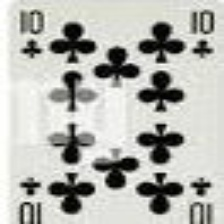

In [ ]:
image, label = dataset[6000]
image

In [ ]:
data_dir = '/content/cards_dataset/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

dataset = PlayingCardDataset(data_dir, transform)

In [ ]:
dataset[100]

(tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
          [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
          ...,
          [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
          [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
          ...,
          [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
          [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],
 
         [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
          [0.0118, 0.0196, 0.3137,  ...,

In [ ]:
image , label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [ ]:
for image, lavel in dataset:
  break

In [ ]:
dataloader = DataLoader(dataset, batch_size = 32, shuffle=True)

In [ ]:
for images, labels in dataloader:
  break

In [ ]:
images.shape

torch.Size([32, 3, 128, 128])

In [ ]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output


In [ ]:
model = SimpleCardClassifer(num_classes = 53)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
print(model)

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (aa): Identity()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (c

In [ ]:
out = model(images)
out.shape

torch.Size([32, 53])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
criterion(out,labels)

tensor(3.9804, grad_fn=<NllLossBackward0>)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '/content/cards_dataset/train'
valid_folder = '/content/cards_dataset/valid'
test_folder = '/content/cards_dataset/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * labels.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(val_loader.dataset)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 16.78it/s]


Epoch 1/10 - Train Loss: 1.4925, Train Acc: 58.45% - Val Loss: 0.3951, Val Acc: 87.92%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 18.07it/s]


Epoch 2/10 - Train Loss: 0.5438, Train Acc: 84.54% - Val Loss: 0.2306, Val Acc: 92.45%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 12.69it/s]


Epoch 3/10 - Train Loss: 0.3468, Train Acc: 89.76% - Val Loss: 0.2338, Val Acc: 95.09%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 12.93it/s]


Epoch 4/10 - Train Loss: 0.2420, Train Acc: 92.71% - Val Loss: 0.2173, Val Acc: 94.34%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 17.17it/s]


Epoch 5/10 - Train Loss: 0.1880, Train Acc: 94.46% - Val Loss: 0.1779, Val Acc: 95.09%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 14.48it/s]


Epoch 6/10 - Train Loss: 0.1428, Train Acc: 95.75% - Val Loss: 0.1313, Val Acc: 95.09%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 12.92it/s]


Epoch 7/10 - Train Loss: 0.1467, Train Acc: 95.68% - Val Loss: 0.1858, Val Acc: 95.09%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 13.00it/s]


Epoch 8/10 - Train Loss: 0.1161, Train Acc: 96.54% - Val Loss: 0.1761, Val Acc: 94.72%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 16.74it/s]


Epoch 9/10 - Train Loss: 0.1129, Train Acc: 96.43% - Val Loss: 0.1419, Val Acc: 95.85%


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 19.09it/s]

Epoch 10/10 - Train Loss: 0.1198, Train Acc: 96.17% - Val Loss: 0.2082, Val Acc: 94.72%


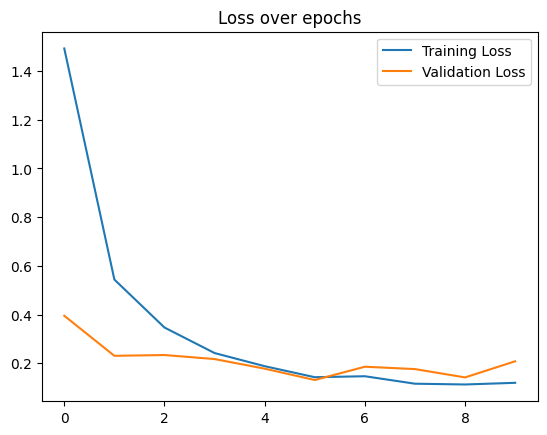

In [ ]:
plt.plot(train_losses, label = 'Training Loss')
plt.plot(val_losses, label = 'Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

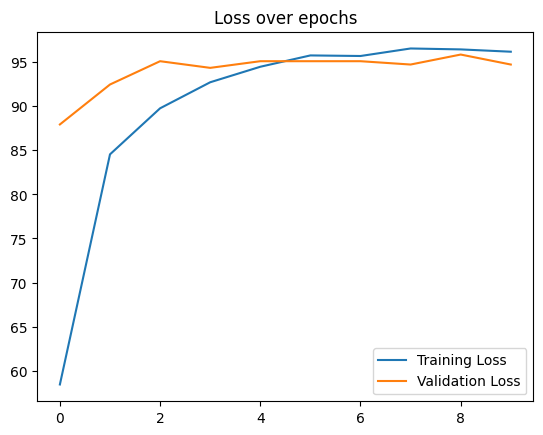

In [ ]:
plt.plot(train_accuracies, label = 'Training Loss')
plt.plot(val_accuracies, label = 'Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

In [ ]:
import torch

torch.save(model.state_dict(), 'better_playing_cards_prediction_model.pth')

